In [1]:
import numpy as np
import pandas as pd
import h5py
import sys
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import curve_fit

sys.path.insert(0, './radiometric')
from LUT_functions import pixel_registration, create_LUT_df
import scipy

In [2]:
#choose filepath to desired data
path = '/Volumes/KESU/mar02/'
#note cam definitions are flipped as of FLIRPY ffc fix 
cal_file2 =  '/Volumes/KESU/calibration_files/cam1pixel.h5'
cal_file1 =  '/Volumes/KESU/calibration_files/cam2pixel.h5'

In [3]:
waves= np.linspace(7,12,61)
temps = [35,36,37,38,39,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,61,62,63,64,65,66,67,68,69,71,75]
angles = np.round(np.linspace(-5,5,25),1)

In [4]:
#import nuc calibration
sys.path.insert(0, './NUC')
from NUC_functions import import_NUC, apply_NUC
cal_path = '/Volumes/KESU/calibration_files/NUC031621.h5'

m1,b1,T_ref1,m2,b2,T_ref2 = import_NUC(cal_path)

In [ ]:
#apply pixel registration and NUC to full dataset

#select ROI
ymin2 = 105; ymax2 = 130;
ymin1 = 130; ymax1 = 155;

mean_ims1 =[]
mean_ims2 =[]
std_ims1  =[]
std_ims2  =[]

mean_ims1n =[]
mean_ims2n =[]
std_ims1n  =[]
std_ims2n  =[]

for i in temps:
    #will create a df and print the names of the keys in the original hdf5 file
    df = create_LUT_df(path,str(i)+'C.h5')
    
    corrected_images1= [] ; corrected_images1n= [];
    corrected_images2= [] ; corrected_images2n= []

    for i in range(len(df)):
        #first without NUC correction
        r = df['imgs1'][i];
        c = pixel_registration(r,cal_file1,waves,ymin1,ymax1)
        
        #now with NUC correction
        T = df['temps1'][i];
        rn = apply_NUC(r,T,m1,b1,T_ref1)
        cn = pixel_registration(rn,cal_file1,waves,ymin1,ymax1)
        
        corrected_images1.append(c)
        corrected_images1n.append(cn)

    for i in range(len(df)):
        #first without NUC correction
        r = df['imgs2'][i];
        c = pixel_registration(r,cal_file2,waves,ymin2,ymax2)
        
        #now with NUC correction
        T = df['temps2'][i];
        rn = apply_NUC(r,T,m2,b2,T_ref2)
        cn = pixel_registration(rn,cal_file2,waves,ymin2,ymax2)
        
        corrected_images2.append(c)
        corrected_images2n.append(cn)

    mean_ims1.append(np.mean(corrected_images1,axis = 0))
    mean_ims1n.append(np.mean(corrected_images1n,axis = 0))
    mean_ims2.append(np.mean(corrected_images2,axis = 0))
    mean_ims2n.append(np.mean(corrected_images2n,axis = 0))


    std_ims1.append(np.std(corrected_images1,axis = 0))
    std_ims2.append(np.std(corrected_images2,axis = 0))
    std_ims1n.append(np.std(corrected_images1n,axis = 0))
    std_ims2n.append(np.std(corrected_images2n,axis = 0))

In [6]:
d = {'BB_temps': temps, 'ims1': list(mean_ims1),'s1': list(std_ims1), 'ims2':list(mean_ims2),'s2': list(std_ims2)}
dn = {'BB_temps': temps, 'ims1': list(mean_ims1n),'s1': list(std_ims1n), 'ims2':list(mean_ims2n),'s2': list(std_ims2n)}


In [7]:
df = pd.DataFrame.from_dict(d, orient='index')
df = df.transpose()

dfn = pd.DataFrame.from_dict(dn, orient='index')
dfn = dfn.transpose()

df

,BB_temps,ims1,s1,ims2,s2
0,35,"[[22079.54, 22076.18, 22079.58, 22079.54, 2207...","[[8.899348290745788, 8.90828827553307, 10.3389...","[[22706.04, 22705.66, 22712.5, 22715.18, 22722...","[[9.9989199416737, 10.176168237602992, 10.4182..."
1,36,"[[22089.14, 22087.7, 22091.28, 22090.46, 22080...","[[5.474522810254791, 6.483826030978932, 8.2838...","[[22718.96, 22718.38, 22721.68, 22727.1, 22733...","[[6.75561988273467, 6.598909000736412, 6.88023..."
2,37,"[[22087.94, 22083.74, 22086.94, 22087.94, 2208...","[[7.1544671359927285, 8.006397442045955, 7.950...","[[22722.9, 22722.48, 22726.74, 22731.9, 22739....","[[7.453858061433692, 7.795485873247416, 8.4971..."
3,38,"[[22088.8, 22085.54, 22088.3, 22087.02, 22076....","[[9.178235124467012, 8.668240882670485, 6.9699...","[[22715.02, 22715.42, 22720.68, 22723.54, 2272...","[[6.984955261130887, 6.750822172150589, 6.2958..."
4,39,"[[22089.96, 22087.3, 22088.82, 22089.52, 22082...","[[7.732942518860462, 8.04238770515324, 10.1063...","[[22722.98, 22721.1, 22728.84, 22733.74, 22736...","[[8.682718468313942, 9.57496736286866, 7.30304..."
5,41,"[[22097.74, 22094.62, 22096.46, 22096.92, 2208...","[[7.888117646181502, 8.009094830253918, 7.5985...","[[22733.5, 22733.44, 22739.64, 22743.36, 22748...","[[5.834380858325929, 6.568591934349399, 7.2808..."
6,42,"[[22087.12, 22086.36, 22089.48, 22089.84, 2208...","[[9.140328221677821, 8.9905728404813, 9.809668...","[[22731.06, 22730.32, 22738.5, 22743.98, 22749...","[[5.380185870395186, 5.691888965888213, 5.4, 5..."
7,43,"[[22087.92, 22086.48, 22090.12, 22091.1, 22084...","[[4.426465858899173, 4.36, 4.785979523566726, ...","[[22725.54, 22724.04, 22731.1, 22736.02, 22743...","[[7.56560638680073, 6.121960470306876, 6.36867..."
8,44,"[[22096.18, 22096.36, 22099.16, 22096.74, 2209...","[[9.793753111039708, 9.886880195491395, 9.5746...","[[22739.42, 22736.76, 22742.34, 22747.44, 2275...","[[7.143780511745866, 7.759020556745549, 6.5995..."
9,45,"[[22097.0, 22094.34, 22099.04, 22101.5, 22094....","[[8.052328855678958, 10.099227693244666, 9.736...","[[22737.08, 22738.3, 22744.18, 22749.9, 22756....","[[7.710616058396372, 7.12320152740325, 9.02427..."


In [8]:

df.to_hdf('/Volumes/KESU/calibration_data/LUT/df_no_NUC.h5', key='s')
dfn.to_hdf('/Volumes/KESU/calibration_data/LUT/df_NUC.h5', key='s')


/Users/kirahart/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2434: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['BB_temps', 'ims1', 's1', 'ims2', 's2'], dtype='object')]

  pytables.to_hdf(


In [ ]:
def finv(y,A,B):
    return ((y-B)/A)**0.5


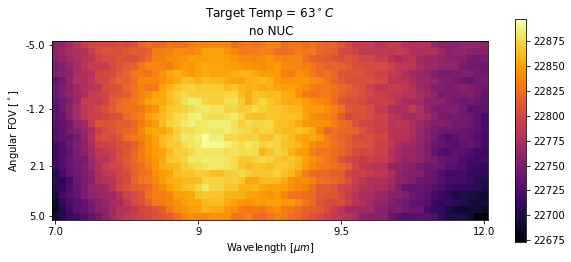

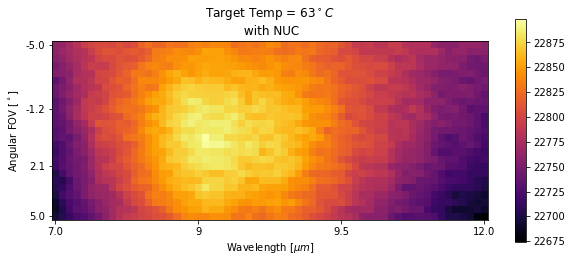

In [14]:
cmin = np.min(list(df['ims1'])); cmax=np.max(list(df['ims2']))

j = 25;
plt.matshow(df['ims2'][j],cmap = 'inferno' )
plt.colorbar()
plt.ylabel('Angular FOV [$^\circ$]')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,24], [angles[0], angles[9],angles[17],angles[24]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$ \n no NUC')
#plt.clim(cmin,cmax)
plt.show()

cmin = np.min(list(dfn['ims1'])); cmax=np.max(list(df['ims2']))

plt.matshow(dfn['ims2'][j],cmap = 'inferno' )
plt.colorbar()
plt.ylabel('Angular FOV [$^\circ$]')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,24], [angles[0], angles[9],angles[17],angles[24]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$ \n with NUC')
plt.show()

In [10]:
#create sum column
df["totalrad"] = df['ims2']+df['ims1']
df["totalstd"] = (df['s2']**2+df['s1']**2)**0.5

dfn["totalrad"] = dfn['ims2']+dfn['ims1']
dfn["totalstd"] = (dfn['s2']**2+dfn['s1']**2)**0.5

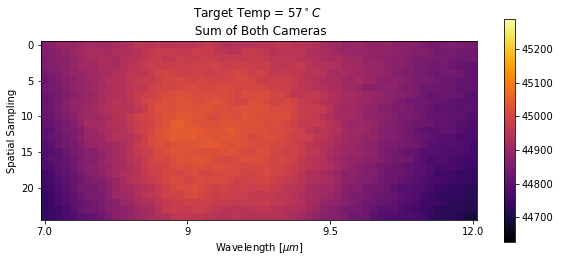

In [12]:
cmin = np.min(list(df['totalrad'])); cmax=np.max(list(df['totalrad']))

j = 20;
plt.matshow(df['totalrad'][j],cmap = 'inferno' )
plt.colorbar()
plt.ylabel('Spatial Sampling')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$  \n Sum of Both Cameras')
plt.clim(cmin,cmax)
plt.show()

In [76]:
# pixel fit 
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x**2 + B

def finv(y,A,B):
    return ((y-B)/A)**(1/4)


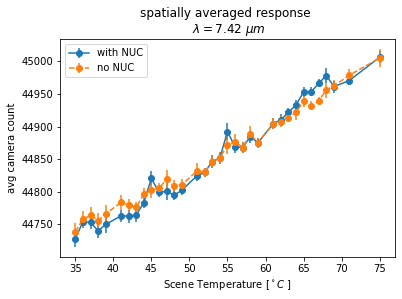

In [41]:
x = 50
plt.errorbar(dfn['BB_temps'],get_slice_avg(dfn['totalrad'],x),yerr=get_slice_avg(dfn['totalstd'],x),fmt='o-', label = 'with NUC')
plt.errorbar(df['BB_temps'],get_slice_avg(df['totalrad'],x),yerr=get_slice_avg(df['totalstd'],x),fmt='o--',label = 'no NUC')
plt.title('spatially averaged response \n $\lambda = $' + str(round(waves[x],2)) + ' $  \mu m$')
plt.xlabel('Scene Temperature [$^\circ C$ ] ')
plt.ylabel('avg camera count')
plt.legend()
plt.show()



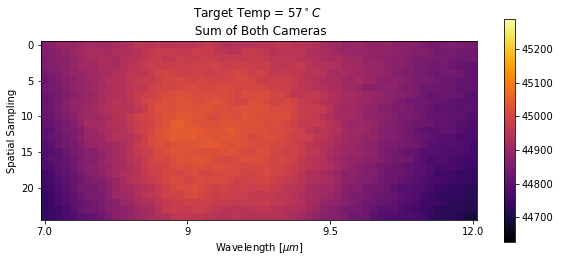

In [20]:
'''explore adding spatial and spectral averaging'''

cmin = np.min(list(df['totalrad'])); cmax=np.max(list(df['totalrad']))

j = 20;
plt.matshow(df['totalrad'][j],cmap = 'inferno' )
plt.colorbar()
plt.ylabel('Spatial Sampling')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$  \n Sum of Both Cameras')
plt.clim(cmin,cmax)
plt.show()

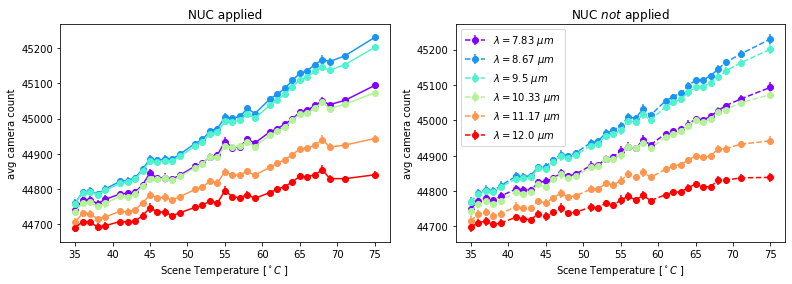

In [25]:
xs =[10,20,30,40,50,60];
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(xs)))
fig, axes = plt.subplots(ncols=2, figsize=(13, 4), tight_layout=False)

ax1, ax2 = axes
for i in range(len(xs)):
    ax1.errorbar(dfn['BB_temps'],get_slice_avg(dfn['totalrad'],xs[i]),yerr=get_slice_avg(dfn['totalstd'],xs[i]),fmt='o-', c =colors[i],label = '$\lambda = $' + str(round(waves[xs[i]],2)) + ' $  \mu m$')
    ax2.errorbar(df['BB_temps'],get_slice_avg(df['totalrad'],xs[i]),yerr=get_slice_avg(df['totalstd'],xs[i]),fmt='o--', c =colors[i],label = '$\lambda = $' + str(round(waves[xs[i]],2)) + ' $  \mu m$')
ax1.set_title('NUC applied')
ax2.set_title('NUC $not$ applied')
ax1.set_xlabel('Scene Temperature [$^\circ C$ ] ')
ax1.set_ylabel('avg camera count')
ax2.set_xlabel('Scene Temperature [$^\circ C$ ] ')
ax2.set_ylabel('avg camera count')
ax2.legend()
plt.show()

In [21]:
#make a plot of response vs. wavelength for bb temp
response1 = [];
std1 = []
response2 = [];
std2 = []
for i in range(len(waves)):
    sli1= get_slice_avg(dfn['ims1'],i)
    s1= get_slice_avg(dfn['s1'],i)
    response1.append(sli1)
    std1.append(s1)
    
    sli2= get_slice_avg(dfn['ims2'],i)
    s2= get_slice_avg(dfn['s2'],i)
    response2.append(sli2)
    std2.append(s2)

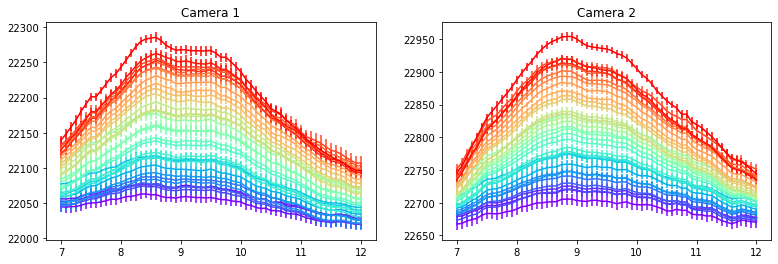

In [22]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(temps)))
fig, axes = plt.subplots(ncols=2, figsize=(13, 4), tight_layout=False)
ax1, ax2 = axes
for i in range(len(temps)):
    ax1.errorbar(waves, np.transpose(response1)[i],yerr=np.transpose(std1)[i],label = str(temps[i])+' $^\circ C$',c=colors[i])
    ax2.errorbar(waves, np.transpose(response2)[i],yerr=np.transpose(std2)[i],label = str(temps[i])+' $^\circ C$',c=colors[i])
#plt.legend()
ax1.set_title('Camera 1')
ax2.set_title('Camera 2')
plt.show()

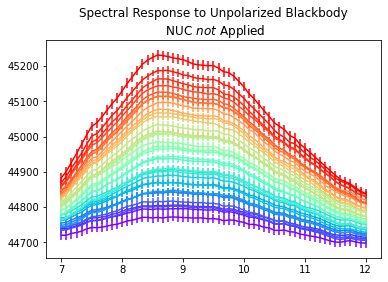

In [24]:
#make a plot of response vs. wavelength for bb temp
response = [];
std = []
for i in range(len(waves)):
    sli= get_slice_avg(df['totalrad'],i)
    s= get_slice_avg(df['totalstd'],i)
    response.append(sli)
    std.append(s)

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(temps)))
for i in range(len(temps)):
    plt.errorbar(waves, np.transpose(response)[i],yerr=np.transpose(std)[i],label = str(temps[i])+' $^\circ C$',c=colors[i])
#plt.legend()
plt.title('Spectral Response to Unpolarized Blackbody\n NUC $not$ Applied')
plt.show()

In [28]:
def get_slice(df,x,y):
    sli = []
    for i in range(len(df)):
        s = df[i]
        sli.append(s[y,x])
    return(sli)

def get_slice_avg(df,x):
    sli = []
    for i in range(len(df)):
        s = df[i]
        sli.append(np.mean(s[:,x]))
    return(sli)

In [77]:

def calc_rad_coef(db):
    '''do pixel by pixel fit and determine A and B coefficients'''
    spec = len(db['ims1'][1][1])
    spat = len(db['ims1'][1])
    Ts = df['BB_temps'];
    
    #preallocate coefficient arrays
    A1 = np.zeros([spat,spec]);B1 = np.zeros([spat,spec]);
    A2 = np.zeros([spat,spec]);B2 = np.zeros([spat,spec]);
    At = np.zeros([spat,spec]);Bt = np.zeros([spat,spec]);
    
    for i in range(spat):
        for j in range(spec):
            rs1 = get_slice(db['ims1'],j,i)
            rs2 = get_slice(db['ims2'],j,i)
            [a1,b1],cov1 = curve_fit(f, Ts, rs1)
            [a2,b2],cov2 = curve_fit(f, Ts, rs2)
            [at,bt],covt = curve_fit(f, Ts, np.add(rs1,rs2))
            A1[i,j] = a1;B1[i,j] =b1
            A2[i,j] = a2;B2[i,j] =b2
            At[i,j] = at;Bt[i,j] =bt
    return([A1,B1],[A2,B2],[At,Bt])        
 

In [78]:
[A1,B1],[A2,B2],[At,Bt] = calc_rad_coef(df)

In [79]:
[A1n,B1n],[A2n,B2n],[Atn,Btn] = calc_rad_coef(dfn)

In [82]:
#writetohdf5

#choose filepath to desired data
save_path =   '/Volumes/KESU/calibration_files/'
name =  "LUT031721" 

#create hdf5 file
hf = h5py.File(save_path + name + '.h5', 'w')
hf.create_dataset('/A1',  data= A1)
hf.create_dataset('/B1',  data= B1)
hf.create_dataset('/A2',  data= A2)
hf.create_dataset('/B2',  data= B2)
hf.create_dataset('/At',  data= At)
hf.create_dataset('/Bt',  data= Bt)

hf.create_dataset('/A1n',  data= A1n)
hf.create_dataset('/B1n',  data= B1n)
hf.create_dataset('/A2n',  data= A2n)
hf.create_dataset('/B2n',  data= B2n)
hf.create_dataset('/Atn',  data= Atn)
hf.create_dataset('/Btn',  data= Btn)

#hf.create_dataset('/transmission1',  data= transmission1)
#hf.create_dataset('/transmission2',  data= transmission2)
hf.close()

OSError: Unable to create file (unable to open file: name = '/Volumes/KESU/calibration_files/LUT031721.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 602)

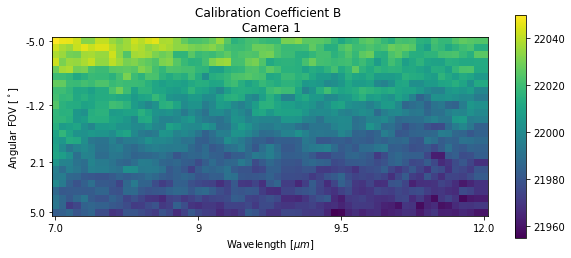

In [88]:
plt.matshow(B1n,cmap = 'viridis' )
cbar = plt.colorbar()
plt.ylabel('Angular FOV [$^\circ$]') 
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,24], [angles[0], angles[9],angles[17],angles[24]])
plt.title('Calibration Coefficient B \n Camera 1')
#plt.clim(-5,5)
plt.show()

In [103]:
x = 5
temps = np.linspace(0,85,86)
fit1 = f(temps,np.mean(A1n,0)[x],np.mean(B1n,0)[x])
fit2 = f(temps,np.mean(A2n,0)[x],np.mean(B2n,0)[x])

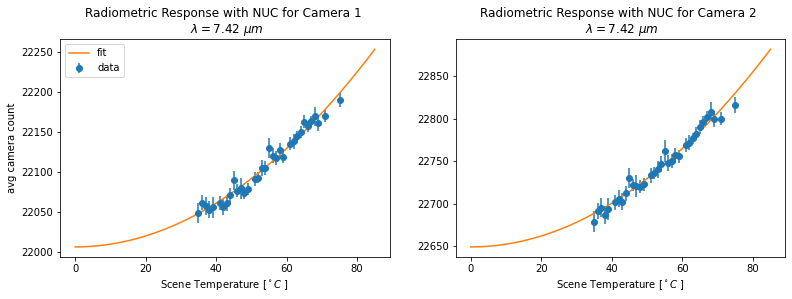

In [104]:


fig, axes = plt.subplots(ncols=2, figsize=(13, 4), tight_layout=False)

axes[0].errorbar(dfn['BB_temps'],get_slice_avg(dfn['ims1'],x),yerr=get_slice_avg(dfn['totalstd'],x),fmt='o',label = "data")
axes[0].plot(temps,fit1,label = 'fit')
axes[1].errorbar(dfn['BB_temps'],get_slice_avg(dfn['ims2'],x),yerr=get_slice_avg(dfn['totalstd'],x),fmt='o')
axes[1].plot(temps,fit2)
axes[0].legend()
axes[0].set_title('Radiometric Response with NUC for Camera 1 \n $\lambda = $' + str(round(waves[x],2)) + ' $  \mu m$')
axes[1].set_title('Radiometric Response with NUC for Camera 2 \n $\lambda = $' + str(round(waves[x],2)) + ' $  \mu m$')
axes[0].set_xlabel('Scene Temperature [$^\circ C$ ] ')
axes[1].set_xlabel('Scene Temperature [$^\circ C$ ] ')
axes[0].set_ylabel('avg camera count')
plt.show()

In [37]:
def radiometric_retrieval(df,j,At,Bt):
    #attempt retrival
    Ts= np.zeros([25,len(waves)])
    for w in range(len(waves)):
        for s in range(25):
            data= list(df['ims1'][j]+df['ims2'][j])[s][w]
            A = At[s][w]
            B = Bt[s][w]
            t = finv(data,A,B)
            Ts[s][w] = t
    return(Ts)        

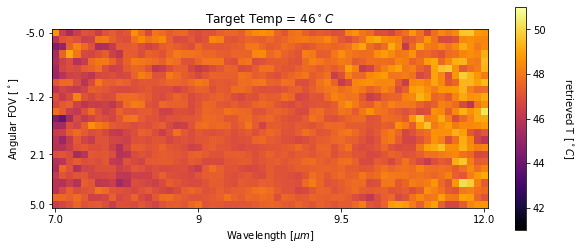

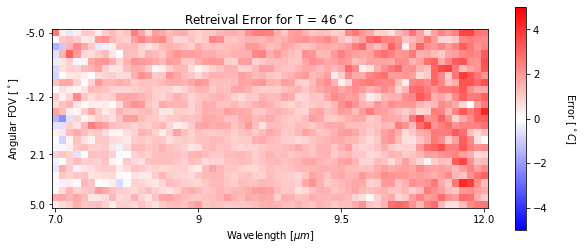

In [38]:
j = 10 ;
Ts = radiometric_retrieval(df,j,At,Bt) 


plt.matshow(Ts,cmap = 'inferno' )
cbar = plt.colorbar()
cbar.set_label('retrieved T [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Angular FOV [$^\circ$]')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,24], [angles[0], angles[9],angles[17],angles[24]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$')
plt.clim(temps[j]-5,temps[j]+5)
plt.show()

plt.matshow(Ts-temps[j],cmap = 'bwr' )
cbar = plt.colorbar()
cbar.set_label('Error [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Angular FOV [$^\circ$]') 
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,24], [angles[0], angles[9],angles[17],angles[24]])
plt.title('Retreival Error for T = ' + str(temps[j])+ '$^\circ C$')
plt.clim(-5,5)
plt.show()

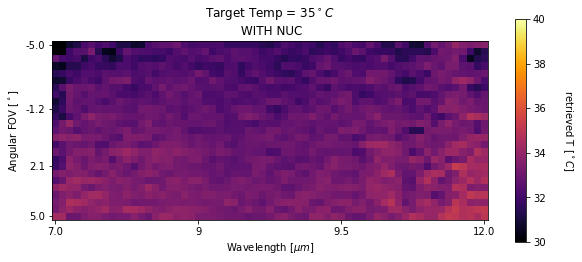

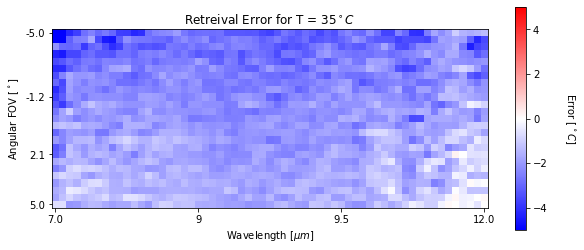

In [37]:
j = 0 ;
Ts = radiometric_retrieval(dfn,j,Atn,Btn) 


plt.matshow(Ts,cmap = 'inferno' )
cbar = plt.colorbar()
cbar.set_label('retrieved T [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Angular FOV [$^\circ$]')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,24], [angles[0], angles[9],angles[17],angles[24]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$ \n WITH NUC')
plt.clim(temps[j]-5,temps[j]+5)
plt.show()

plt.matshow(Ts-temps[j],cmap = 'bwr' )
cbar = plt.colorbar()
cbar.set_label('Error [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Angular FOV [$^\circ$]') 
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,24], [angles[0], angles[9],angles[17],angles[24]])
plt.title('Retreival Error for T = ' + str(temps[j])+ '$^\circ C$')
plt.clim(-5,5)
plt.show()

<ipython-input-26-23b34f7ad30f>:6: RuntimeWarning: invalid value encountered in double_scalars
  return ((y-B)/A)**(1/4)


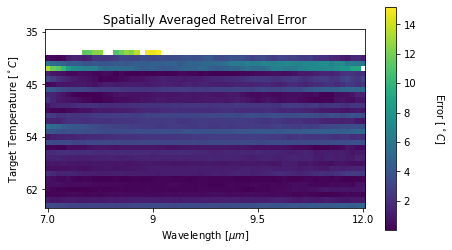

In [40]:
#summarize average error wavelength and target temp
error = np.zeros([len(temps),len(waves)])
for j in range(len(temps)):
    Ts = radiometric_retrieval(df,j,At,Bt) 
    err = np.abs(temps[j]-np.mean(Ts,axis = 0))
    error[j] = err

plt.matshow(error,cmap = 'viridis' )
cbar = plt.colorbar()
cbar.set_label('Error [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Target Temperature [$^\circ C$]') 
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 10,20,30], [temps[0], temps[9],temps[17],temps[24]])
plt.title('Spatially Averaged Retreival Error')
plt.show()

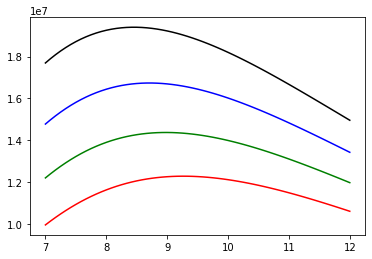

In [73]:
'''compare to BB function'''
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

wavelengths = waves

#choose maximum resolvable temp to be 300 C
ref = planck(wavelengths, 300  + 273.15)

intensity40 = planck(wavelengths*1e-6, 40.  + 273.15)
intensity50 = planck(wavelengths*1e-6, 50.  + 273.15)
intensity60 = planck(wavelengths*1e-6, 60.  + 273.15)
intensity70 = planck(wavelengths*1e-6, 70.  + 273.15)

plt.plot(wavelengths, intensity40, 'r-') 
plt.plot(wavelengths, intensity50, 'g-') # 5000K green line
plt.plot(wavelengths, intensity60, 'b-') # 6000K blue line
plt.plot(wavelengths, intensity70, 'k-') # 7000K black line
 
# show the plot
plt.show()

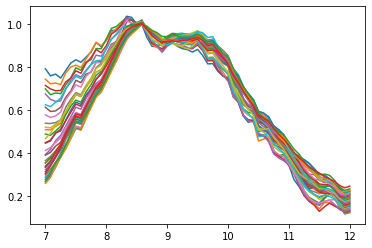

In [33]:
transmission1 =[] 
for i in range(len(temps)):
    temp = temps[i];
    intensity = planck(wavelengths*1e-6, temp  + 273.15)

    ref =  intensity/np.max(intensity)
    data = np.transpose(response1)[i]
    offset = data - np.min(data)
    norm = offset/np.max(offset)

    plt.plot(wavelengths, 1-(intensity/np.max(intensity)-norm)) 
    transmission1.append(1-(intensity/np.max(intensity)-norm))
plt.show()

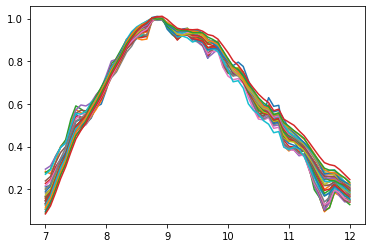

In [34]:
transmission2 =[] 
for i in range(len(temps)):
    temp = temps[i];
    intensity = planck(wavelengths*1e-6, temp  + 273.15)

    ref =  intensity/np.max(intensity)
    data = np.transpose(response2)[i]
    offset = data - np.min(data)
    norm = offset/np.max(offset)

    plt.plot(wavelengths, 1-(intensity/np.max(intensity)-norm)) 
    transmission2.append(1-(intensity/np.max(intensity)-norm))
plt.show()

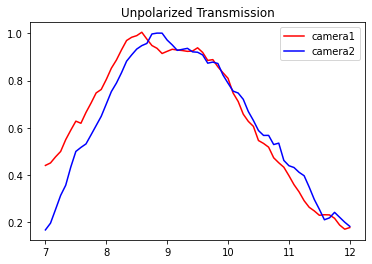

In [35]:
plt.plot(waves,np.mean(transmission1,0),'r',label = "camera1")
plt.plot(waves,np.mean(transmission2,0),'b',label = "camera2")
plt.title("Unpolarized Transmission")
plt.legend()
plt.show()

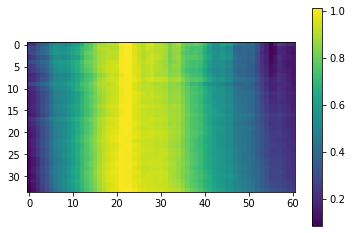

In [81]:
plt.imshow(transmission2)
plt.colorbar()
plt.show()